<a href="https://colab.research.google.com/github/Jossubin/Contest-Big_Data/blob/main/%EC%A0%9C11%ED%9A%8C_%EC%82%B0%EC%97%85%ED%86%B5%EC%83%81%EC%9E%90%EC%9B%90%EB%B6%80_%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%99%9C%EC%9A%A9_BI%EA%B3%B5%EB%AA%A8%EC%A0%84_%EB%B6%84%EC%84%9D%EA%B3%BC%EC%A0%9C_5_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Native libraries
import os
import math
# Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
plt.rc('font', family='NanumGothic')

#2. 데이터 읽기 (pandas)




In [ ]:
#결측데이터 유무 확인 함수
def nan_counter(list_of_series):
    nan_polluted_series_counter = 0
    for series in list_of_series:
        if series.isnull().sum().sum() > 0:
            nan_polluted_series_counter+=1
    print(nan_polluted_series_counter)

## 데이터 읽기

In [ ]:
all_mySeries = []
actual_mySeries = []
predict_mySeries = []


df = pd.read_csv('/content/sample_data/datasets.csv')
df = df.sort_values(by=['일자', '발전소코드'])

In [ ]:
df.head(3)

,일자,구분1,발전소코드,발전소용량(KW),0:00,1:00,2:00,3:00,4:00,5:00,...,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,합계
7728,2023-03-01,실측,B1727,1642.50,0.0,0.0,0,0,0,0.0,...,744.00,304.80,139.20,9.60,0.0,0,0,0,0,4918.80
7729,2023-03-01,예측,B1727,1642.50,0.0,0.0,0,0,0,0.0,...,601.67,336.14,160.91,12.49,0.0,0,0,0,0,3886.39
7732,2023-03-01,실측,B1728,2082.08,0.0,0.0,0,0,0,0.0,...,32.40,253.80,608.40,1247.40,880.2,36,0,0,0,3763.80


### type conversion and replace error data

In [ ]:
## replace '-'
df = df.replace('-', 0)

In [ ]:
# 열별로 데이터형 변환할 딕셔너리 생성
dtype_mapping = {
    '2:00': float,
    '3:00': float,
    '4:00': float,
    '20:00': float,
    '21:00': float,
    '22:00': float,
    '23:00': float
}

# 여러 개의 열을 한꺼번에 데이터형 변환
df = df.astype(dtype_mapping)

In [ ]:
df.dtypes  # 데이터타입 확인

일자            object
구분1           object
발전소코드         object
발전소용량(KW)    float64
0:00         float64
1:00         float64
2:00         float64
3:00         float64
4:00         float64
5:00         float64
6:00         float64
7:00         float64
8:00         float64
9:00         float64
10:00        float64
11:00        float64
12:00        float64
13:00        float64
14:00        float64
15:00        float64
16:00        float64
17:00        float64
18:00        float64
19:00        float64
20:00        float64
21:00        float64
22:00        float64
23:00        float64
합계           float64
dtype: object

### descriptive statistics

In [ ]:
df.describe()

,발전소용량(KW),0:00,1:00,2:00,3:00,4:00,5:00,6:00,7:00,8:00,...,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,합계
count,10478.000000,10478.000000,10478.000000,10478.000000,10478.000000,10478.000000,10478.000000,10478.000000,10478.000000,10478.000000,...,10478.000000,10478.000000,10478.000000,10478.000000,10478.000000,10478.000000,10478.000000,10478.000000,10478.000000,10478.000000
mean,1170.411982,5.535597,3.847895,1.783755,1.429550,1.411926,1.395616,3.069223,60.709166,230.756914,...,478.605848,334.019033,291.713824,267.849389,266.224908,299.405024,243.288494,114.366277,41.384805,5041.149679
std,932.526816,48.389084,34.226139,12.771115,12.074967,12.688972,12.300487,14.658899,72.813683,249.648959,...,502.262720,336.108086,651.184268,563.302526,546.779677,568.283085,514.587448,308.663059,163.168295,4747.085174
min,98.825000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.480000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49.200000
25%,496.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.270000,69.260000,...,153.870000,113.392500,43.992500,4.340000,0.000000,0.000000,0.000000,0.000000,0.000000,1988.877500
50%,956.160000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.480000,35.525000,149.425000,...,327.035000,235.115000,99.080000,11.430000,0.000000,0.000000,0.000000,0.000000,0.000000,3715.665000
75%,1200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.180000,76.947500,282.760000,...,557.977500,393.955000,230.920000,52.375000,223.020000,301.602500,99.477500,21.527500,0.747500,5550.300000
max,5587.560000,1601.800000,799.000000,310.000000,472.000000,588.000000,410.000000,611.000000,663.480000,3706.640000,...,3836.320000,3084.960000,46445.330000,3467.480000,3354.770000,3124.170000,2884.220000,1981.660000,1601.800000,57533.930000


In [ ]:
df.shape

(10478, 29)

In [ ]:
time_columns = df.columns[4:28]
time_columns

Index(['0:00', '1:00', '2:00', '3:00', '4:00', '5:00', '6:00', '7:00', '8:00',
       '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00',
       '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00'],
      dtype='object')

### datetime for index

In [ ]:
# 일자와 시간의 값을 합치고 datetime 컬럼 생성
df['date'] = pd.to_datetime(df['일자'])
time_columns = df.columns[4:28]
df2 = df.melt(id_vars=['일자', '구분1', '발전소코드', '발전소용량(KW)'], value_vars=time_columns, var_name='hour', value_name='value')
df2['datetime'] = pd.to_datetime(df2['일자'].astype(str) + ' ' + df2['hour'], format='%Y-%m-%d %H')

# df2 = df.melt(id_vars=['일자', '구분1', '발전소코드', '발전소용량(KW)', 'datetime'], value_vars=time_columns, var_name='hour', value_name='value')
df2

,일자,구분1,발전소코드,발전소용량(KW),hour,value,datetime
0,2023-03-01,실측,B1727,1642.500,0:00,0.00,2023-03-01 00:00:00
1,2023-03-01,예측,B1727,1642.500,0:00,0.00,2023-03-01 00:00:00
2,2023-03-01,실측,B1728,2082.080,0:00,0.00,2023-03-01 00:00:00
3,2023-03-01,예측,B1728,2082.080,0:00,2.85,2023-03-01 00:00:00
4,2023-03-01,실측,B1729,2919.525,0:00,0.00,2023-03-01 00:00:00
...,...,...,...,...,...,...,...
251467,2023-03-31,예측,V9025,940.800,23:00,84.87,2023-03-31 23:00:00
251468,2023-03-31,실측,V9026,940.800,23:00,124.38,2023-03-31 23:00:00
251469,2023-03-31,예측,V9026,940.800,23:00,232.82,2023-03-31 23:00:00
251470,2023-03-31,실측,V9027,470.000,23:00,0.00,2023-03-31 23:00:00


실측 - 예측값과 함께, pivot

## gap 오차율 계산

In [ ]:
df_combined = df2.pivot(index=['datetime', '발전소코드', '발전소용량(KW)'], columns='구분1', values='value').reset_index()
df_combined['gap'] = abs((df_combined['실측'] - df_combined['예측'])) / df_combined['발전소용량(KW)'] * 100

In [ ]:
df_combined.set_index('datetime')

구분1,발전소코드,발전소용량(KW),실측,예측,gap
datetime,,,,,
2023-03-01 00:00:00,B1727,1642.500,0.00,0.00,0.000000
2023-03-01 00:00:00,B1728,2082.080,0.00,2.85,0.136882
2023-03-01 00:00:00,B1729,2919.525,0.00,3.50,0.119883
2023-03-01 00:00:00,B1730,737.870,0.00,1.39,0.188380
2023-03-01 00:00:00,B1731,2956.875,0.00,8.94,0.302346
...,...,...,...,...,...
2023-03-31 23:00:00,V9023,2499.840,0.00,0.00,0.000000
2023-03-31 23:00:00,V9024,940.800,222.73,254.06,3.330145
2023-03-31 23:00:00,V9025,940.800,73.04,84.87,1.257440


## 발전소 코드별로 시계열 데이터 시각화

<ipython-input-22-4e5ca33668b5>:17: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  plt.tight_layout()
<ipython-input-22-4e5ca33668b5>:17: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  plt.tight_layout()
<ipython-input-22-4e5ca33668b5>:17: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


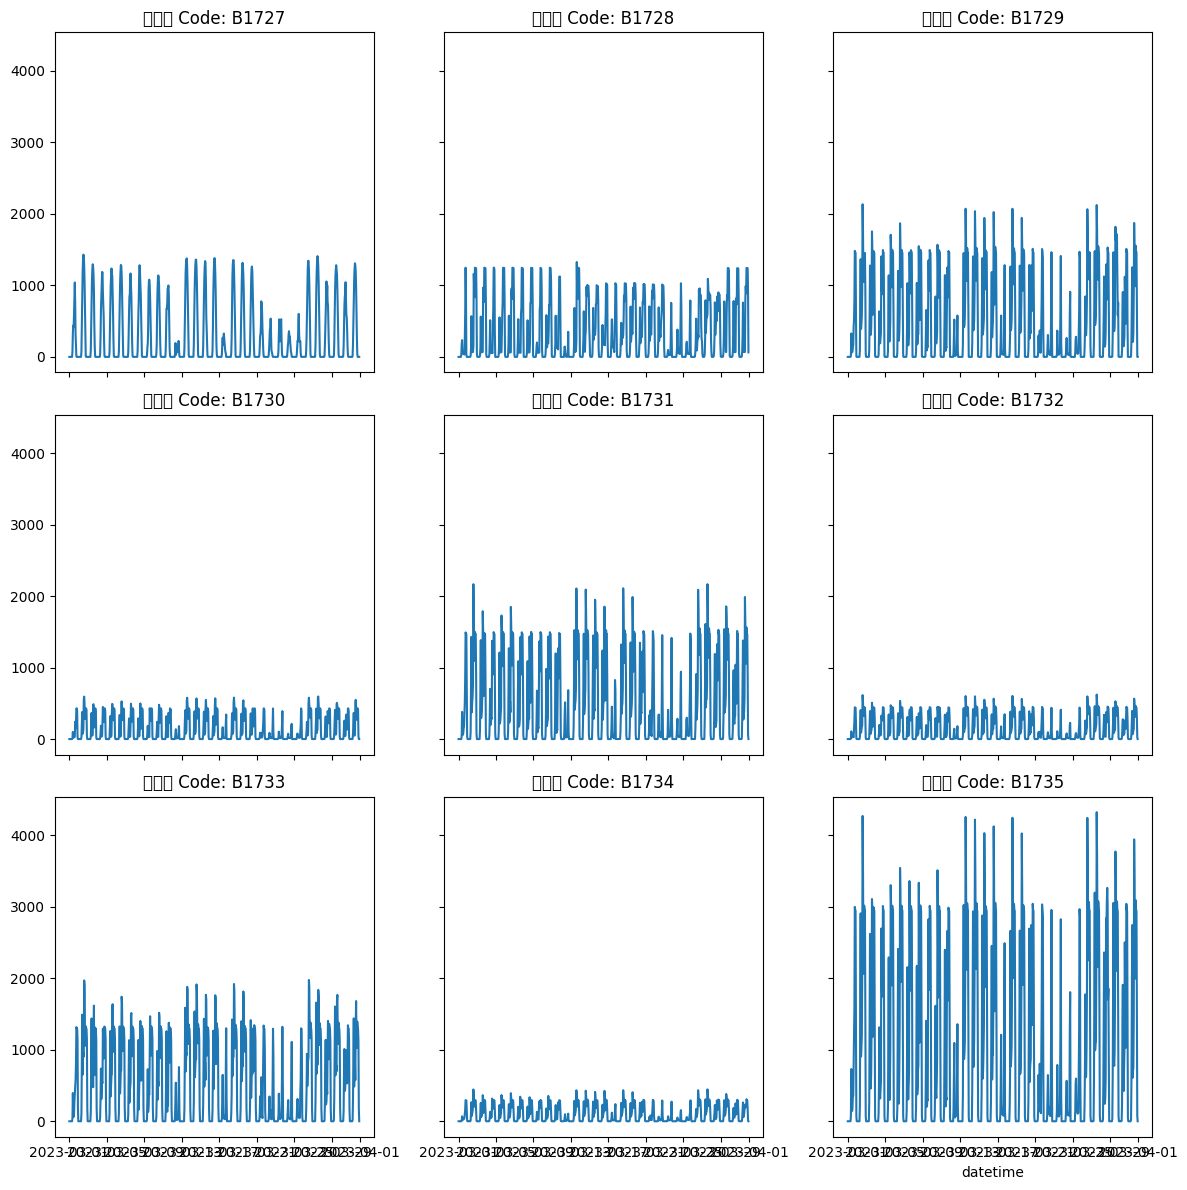

In [ ]:
unique_codes = df_combined['발전소코드'].unique()
num_plots = 9
num_rows = 3
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 12), sharex=True, sharey=True)

for i, code in enumerate(unique_codes[:num_plots]):
    row = i // num_cols
    col = i % num_cols
    df_subset = df_combined[df_combined['발전소코드'] == code]
    axs[row, col].plot(df_subset['datetime'], df_subset['실측'])
    axs[row, col].set_title(f'발전소 Code: {code}')


plt.xlabel('datetime')
plt.tight_layout()
plt.show()

# gap 값에 대한 발전소코드별 클러스터링

In [ ]:
df_pivot = df_combined.pivot(index='datetime', columns='발전소코드', values='gap')
df_pivot

발전소코드,B1727,B1728,B1729,B1730,B1731,B1732,B1733,B1734,B1735,B1736,...,V9018,V9019,V9020,V9021,V9022,V9023,V9024,V9025,V9026,V9027
datetime,,,,,,,,,,,,,,,,,,,,,
2023-03-01 00:00:00,0.000000,0.136882,0.119883,0.188380,0.302346,0.182176,0.103572,0.234221,0.123131,0.0,...,0.0,0.0,0.133881,0.0,0.0,0.0,0.510204,0.426233,0.428359,0.0
2023-03-01 01:00:00,0.000000,0.147929,0.118855,0.185670,0.127838,0.159823,0.102515,0.241319,0.123847,0.0,...,0.0,0.0,0.136737,0.0,0.0,0.0,0.441114,0.419855,0.406037,0.0
2023-03-01 02:00:00,0.000000,0.148890,0.119197,0.185670,0.125808,0.153117,0.104981,0.246642,0.124383,0.0,...,0.0,0.0,0.134595,0.0,0.0,0.0,0.437925,0.423044,0.412415,0.0
2023-03-01 03:00:00,0.000000,0.154173,0.120910,0.184314,0.124794,0.148647,0.105686,0.230672,0.122057,0.0,...,0.0,0.0,0.136023,0.0,0.0,0.0,0.443240,0.418793,0.418793,0.0
2023-03-01 04:00:00,0.000000,0.151291,0.121938,0.184314,0.122427,0.150882,0.102868,0.230672,0.118835,0.0,...,0.0,0.0,0.127811,0.0,0.0,0.0,0.436862,0.427296,0.424107,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31 19:00:00,0.001218,2.122877,6.215395,5.720520,5.811879,5.180276,3.309730,4.302926,3.422424,0.0,...,0.0,0.0,2.674045,0.0,0.0,0.0,2.544643,2.076956,0.184949,0.0
2023-03-31 20:00:00,0.000000,2.849554,4.468878,6.226029,5.594420,3.469164,2.196858,3.004063,2.428609,0.0,...,0.0,0.0,1.631560,0.0,0.0,0.0,1.434949,1.020408,0.573980,0.0
2023-03-31 21:00:00,0.000000,3.573830,31.812024,13.964519,24.742676,19.191050,7.569577,24.238338,25.408049,0.0,...,0.0,0.0,31.866833,0.0,0.0,0.0,1.277636,0.913053,0.730230,0.0


In [ ]:
df_pivot.mean()

발전소코드
B1727    3.438700
B1728    6.026710
B1729    5.418528
B1730    5.603476
B1731    6.160718
           ...   
V9023    3.305269
V9024    3.466273
V9025    3.768443
V9026    3.609175
V9027    2.918128
Length: 169, dtype: float64

In [ ]:
df_error = df_combined.groupby('발전소코드')['gap'].mean().reset_index()
df_error.columns = ['발전소코드', '오차율']

In [ ]:
df_error

,발전소코드,오차율
0,B1727,3.438700
1,B1728,6.026710
2,B1729,5.418528
3,B1730,5.603476
4,B1731,6.160718
...,...,...
164,V9023,3.305269
165,V9024,3.466273
166,V9025,3.768443
167,V9026,3.609175


In [ ]:
df_error.describe()

,오차율
count,169.000000
mean,4.724053
std,3.691884
min,2.541602
25%,3.081273
50%,3.529689
75%,4.634310
max,27.703630


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# 특성 스케일링
scaler = StandardScaler()

X = df_error['오차율'].values.reshape(-1,1)
df_error['오차율'] = scaler.fit_transform(X)
X= df_error['오차율'].values.reshape(-1, 1)
scaled_features2 = scaler.transform(X)
print(df_error)

     발전소코드       오차율
0    B1727 -0.349191
1    B1728  0.353892
2    B1729  0.188667
3    B1730  0.238912
4    B1731  0.390298
..     ...       ...
164  V9023 -0.385440
165  V9024 -0.341700
166  V9025 -0.259610
167  V9026 -0.302878
168  V9027 -0.490615

[169 rows x 2 columns]


In [ ]:
print(scaled_features2)

[[-1.37824521]
 [-1.18723902]
 [-1.23212549]
 [-1.21847548]
 [-1.17734867]
 [-1.28489377]
 [-1.25382594]
 [-1.23403959]
 [-1.26980064]
 [-1.42215714]
 [-1.36193267]
 [-1.31259783]
 [-1.35203849]
 [-1.29000406]
 [-1.24709209]
 [-1.16542454]
 [-1.09162719]
 [-1.36641158]
 [-1.40323229]
 [-1.35624274]
 [-1.39260641]
 [-1.39356552]
 [-1.4000114 ]
 [-1.1643904 ]
 [-1.11651681]
 [-1.27415511]
 [-1.30557633]
 [-1.3661038 ]
 [-1.26977762]
 [-1.29227553]
 [-1.38630458]
 [-1.41610718]
 [-1.36853512]
 [-1.37459074]
 [-1.44445487]
 [-1.43249992]
 [-1.3663771 ]
 [-1.43330405]
 [-1.38915854]
 [-1.36822577]
 [-1.38881458]
 [-1.33734846]
 [-1.36469415]
 [-1.3798423 ]
 [-1.15819191]
 [-1.34350854]
 [-1.27289405]
 [-1.42085472]
 [-1.39671329]
 [-1.43921262]
 [-0.6011462 ]
 [-1.29674843]
 [-1.38325605]
 [-0.83126062]
 [-1.33611803]
 [-1.33158343]
 [-1.43597177]
 [-1.43599606]
 [-1.37916464]
 [-1.27103294]
 [-1.41948851]
 [-1.00551954]
 [-1.41794054]
 [-1.41801645]
 [-1.42036926]
 [-1.42787408]
 [-1.44347

In [ ]:
from numpy import where
from numpy import unique
import matplotlib.pyplot as plt


## 최적의 클러스터 개수 찾기

### KMeans
1. Elbow
2. Silhouette

Elbow 메서드 그래프 출력
올라가는 부분이 있을때, 최적점

Silhouette 계수

Silhouette 계수는 (b(i) - a(i)) / max(a(i), b(i))로 계산됩니다.

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [ ]:
max_clusters = 20

In [ ]:
inertia = []
silhouette_scores = []
for k in range(2, max_clusters+1):
    e_kmeans = KMeans(n_clusters=k)
    e_kmeans.fit(scaled_features2)
    inertia.append(e_kmeans.inertia_) # ELBOW

    # Silhouette 계수 계산
    s_labels = e_kmeans.labels_
    silhouette_avg = silhouette_score(scaled_features2, s_labels)
    silhouette_scores.append(silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

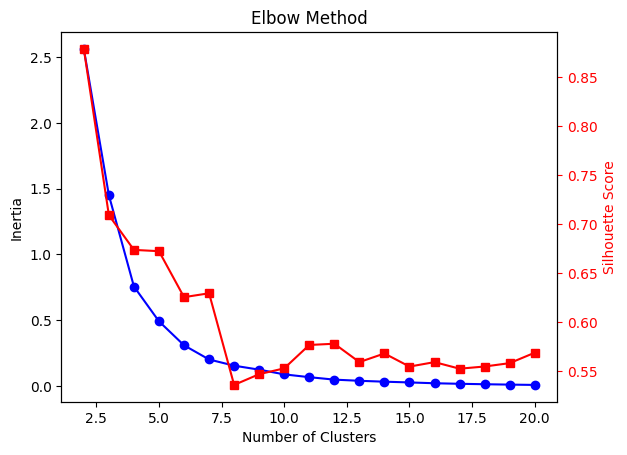

In [ ]:
fig, ax1 = plt.subplots()

ax1.plot(range(2, max_clusters+1), inertia, 'bo-')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method')

# Silhouette 그래프 출력
ax2 = ax1.twinx()
ax2.plot(range(2, max_clusters+1), silhouette_scores, 'rs-')
ax2.set_ylabel('Silhouette Score', color='r')
ax2.tick_params('y', colors='r')

plt.show()

### Gaussian Mixture
 1. Elbow
 2. Silhouette

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
max_clusters = 20
n_components = range(2, max_clusters+1)
bic_scores = []
silhouette_scores = []

for k in n_components:
    gmm = GaussianMixture(n_components=k)
    gmm.fit(scaled_features2)

    # BIC 계산
    bic_scores.append(gmm.bic(scaled_features2))

    # Silhouette 계수 계산
    s_labels = gmm.predict(scaled_features2)
    silhouette_avg = silhouette_score(scaled_features2, s_labels)
    silhouette_scores.append(silhouette_avg)

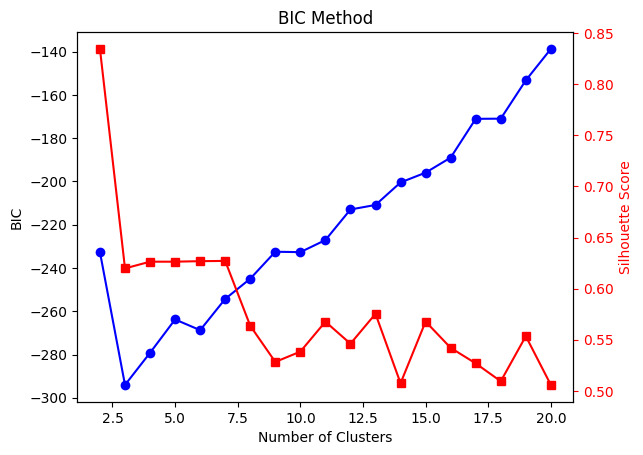

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(n_components, bic_scores, 'bo-')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('BIC')
ax1.set_title('BIC Method')

# Silhouette 그래프 출력
ax2 = ax1.twinx()
ax2.plot(n_components, silhouette_scores, 'rs-')
ax2.set_ylabel('Silhouette Score', color='r')
ax2.tick_params('y', colors='r')

plt.show()

### Hierarchy Clustering
1. 덴드로그램(Dendrogram)

 (1) Single linkage

 (2) complete linkage

 (3) average linkage  

덴드로그램은 클러스터의 병합 단계를 시각화

singe: 두 클러스터 내의 가장 가까운 점 사이의 거리

complete: 가장 먼 점 사이의 거리

average: 모든 점 사이의 평균 거리

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

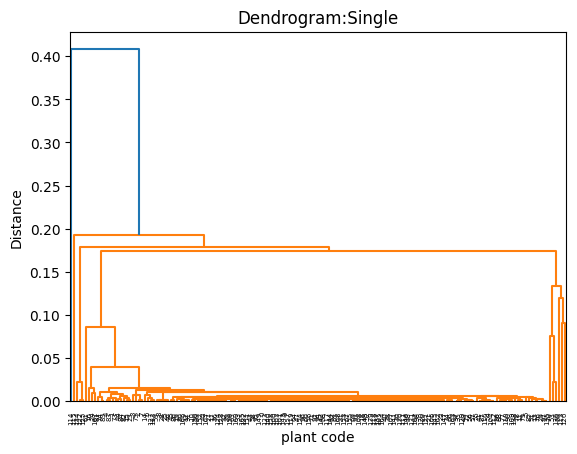

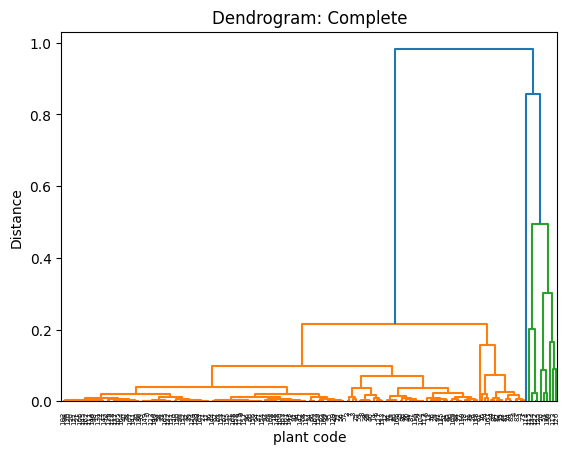

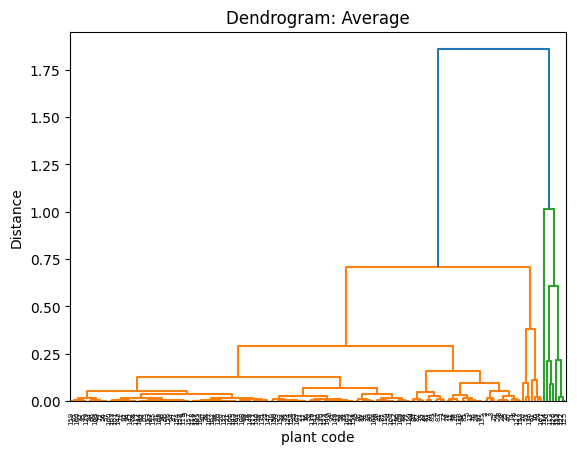

In [ ]:
hc = AgglomerativeClustering(n_clusters=max_clusters)
hc.fit(scaled_features2)

hc_single = linkage(scaled_features2, method='single')
hc_avg = linkage(scaled_features2, method='average')
hc_complete = linkage(scaled_features2, method='complete')

plt.xlabel('plant code')
plt.ylabel('Distance')
plt.title('Dendrogram:Single')
dendrogram(hc_single)
plt.show()

plt.xlabel('plant code')
plt.ylabel('Distance')
plt.title('Dendrogram: Complete')
dendrogram(hc_avg)
plt.show()

plt.xlabel('plant code')
plt.ylabel('Distance')
plt.title('Dendrogram: Average')
dendrogram(hc_complete)
plt.show()

## 클러스터링 알고리즘 적용
1. K-MEANS
2. Gaussian Mixture
3. Hierarchy Clustering
4. DBSCAN

### K-MEANS

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0      6
1      3
2      3
3      3
4      3
      ..
164    6
165    6
166    6
167    6
168    6
Name: 클러스터, Length: 169, dtype: int32


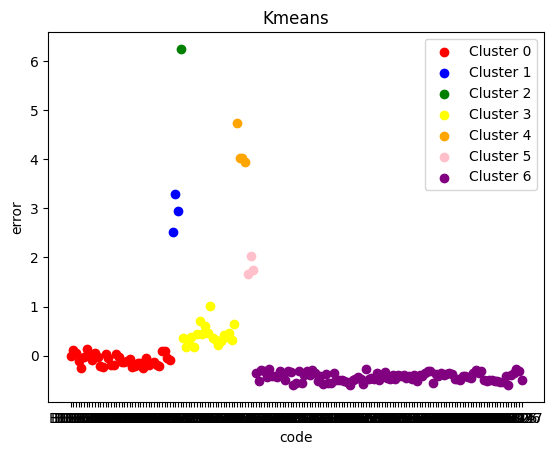

In [ ]:
# K-means 알고리즘을 사용하여 클러스터링 모델 학습
kmeans = KMeans(n_clusters=7, init='k-means++')  # 클러스터 개수는 상황에 맞게 설정합니다
kmeans.fit(scaled_features2)

# 학습된 클러스터링 모델로 데이터를 예측 (각 데이터 포인트가 속한 클러스터를 예측)
labels = kmeans.predict(scaled_features2)

# 클러스터링 결과를 데이터프레임에 추가
df_error['클러스터'] = labels

print(df_error['클러스터'])

cluster_0 = df_error[df_error['클러스터'] == 0]
cluster_1 = df_error[df_error['클러스터'] == 1]
cluster_2 = df_error[df_error['클러스터'] == 2]
cluster_3 = df_error[df_error['클러스터'] == 3]
cluster_4 = df_error[df_error['클러스터'] == 4]
cluster_5 = df_error[df_error['클러스터'] == 5]
cluster_6 = df_error[df_error['클러스터'] == 6]



# 그래프 그리기
plt.scatter(cluster_0['발전소코드'], cluster_0['오차율'], color='red', label='Cluster 0')
plt.scatter(cluster_1['발전소코드'], cluster_1['오차율'], color='blue', label='Cluster 1')
plt.scatter(cluster_2['발전소코드'], cluster_2['오차율'], color='green', label='Cluster 2')
plt.scatter(cluster_3['발전소코드'], cluster_3['오차율'], color='yellow', label='Cluster 3')
plt.scatter(cluster_4['발전소코드'], cluster_4['오차율'], color='orange', label='Cluster 4')
plt.scatter(cluster_5['발전소코드'], cluster_5['오차율'], color='pink', label='Cluster 5')
plt.scatter(cluster_6['발전소코드'], cluster_6['오차율'], color='purple', label='Cluster 6')




# 그래프 설정
plt.xlabel('code')
plt.ylabel('error')
plt.title('Kmeans')
plt.legend()

# 그래프 출력
plt.show()

In [ ]:
print(df_error)

     발전소코드       오차율  클러스터
0    B1727 -0.349191     6
1    B1728  0.353892     3
2    B1729  0.188667     3
3    B1730  0.238912     3
4    B1731  0.390298     3
..     ...       ...   ...
164  V9023 -0.385440     6
165  V9024 -0.341700     6
166  V9025 -0.259610     6
167  V9026 -0.302878     6
168  V9027 -0.490615     6

[169 rows x 3 columns]


### Gaussian Mixture

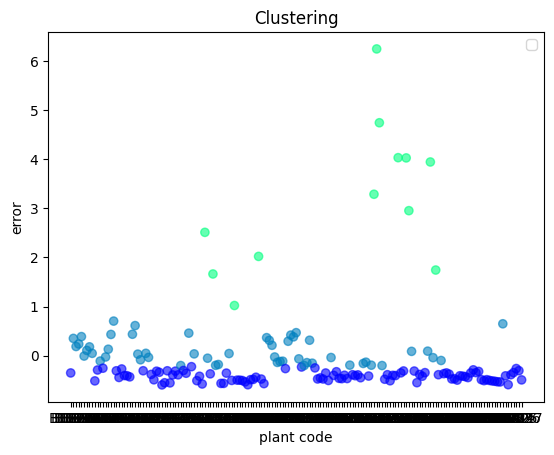

In [ ]:
# 특성 스케일링
scaler = StandardScaler()

X = df_error['오차율'].values.reshape(-1,1)
Z = scaler.fit_transform(X)

gmm = GaussianMixture(n_components = 3)
gmm.fit(Z)

plt.scatter(df_error['발전소코드'], Z,
           c = GaussianMixture(n_components = 3).fit_predict(Z), cmap =plt.cm.winter, alpha = 0.6)

plt.xlabel('plant code')
plt.ylabel('error')
plt.title('Clustering')
plt.legend()
plt.show()

### Hierarchy Clustering

In [ ]:
# 특성 스케일링
scaler = StandardScaler()

X = df_error['오차율'].values.reshape(-1,1)
df_error['오차율'] = scaler.fit_transform(X)
scaled_features2 = scaler.transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0      2
1      4
2      4
3      4
4      4
      ..
164    2
165    2
166    2
167    2
168    2
Name: 클러스터, Length: 169, dtype: int64


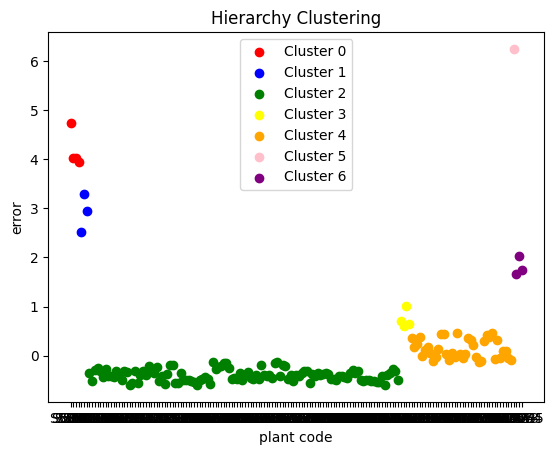

In [ ]:
hcluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='complete')
hcluster.fit_predict(scaled_features2)
hcluster_label = hcluster.labels_

df_error['클러스터'] = hcluster_label

print(df_error['클러스터'])

colors = ['red', 'blue', 'green', 'yellow', 'orange', 'pink', 'purple']

# 각 클러스터에 대해 그래프 그리기
for cluster_id in range(7):
    cluster = df_error[df_error['클러스터'] == cluster_id]
    plt.scatter(cluster['발전소코드'], cluster['오차율'], color=colors[cluster_id], label='Cluster {}'.format(cluster_id))

plt.xlabel('plant code')
plt.ylabel('error')
plt.title('Hierarchy Clustering')
plt.legend()
plt.show()

In [ ]:
print(df_error)

     발전소코드       오차율  클러스터
0    B1727 -0.349191     2
1    B1728  0.353892     4
2    B1729  0.188667     4
3    B1730  0.238912     4
4    B1731  0.390298     4
..     ...       ...   ...
164  V9023 -0.385440     2
165  V9024 -0.341700     2
166  V9025 -0.259610     2
167  V9026 -0.302878     2
168  V9027 -0.490615     2

[169 rows x 3 columns]


In [ ]:
from sklearn.mixture import GaussianMixture

### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from numpy import where
from numpy import unique
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
# 특성 스케일링
scaler = StandardScaler()

X = df_error['오차율'].values.reshape(-1,1)
df_error['오차율'] = scaler.fit_transform(X)
scaled_features2 = scaler.fit_transform(X)

In [ ]:
dbscan = DBSCAN(eps=0.005, min_samples=6)
db_result = dbscan.fit_predict(scaled_features2)
db_label = dbscan.labels_
df_error['클러스터'] = db_label

In [ ]:
sample_cores=np.zeros_like(db_label,dtype=bool)

sample_cores[dbscan.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(db_label))- (1 if -1 in db_label else 0)
print('No of clusters:',n_clusters)

No of clusters: 7


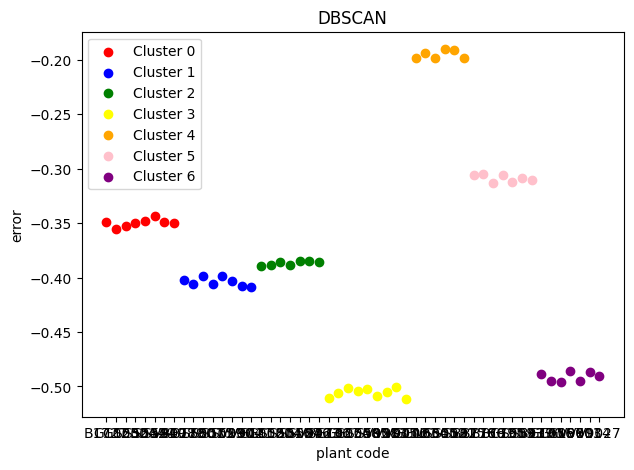

In [ ]:
plt.figure(figsize=(7,5))

colors = ['red', 'blue', 'green', 'yellow', 'orange', 'pink', 'purple']

# 각 클러스터에 대해 그래프 그리기
for cluster_id in range(0,7):
    cluster = df_error[df_error['클러스터'] == cluster_id]
    plt.scatter(cluster['발전소코드'], cluster['오차율'], color=colors[cluster_id], label='Cluster {}'.format(cluster_id))


plt.xlabel('plant code')
plt.ylabel('error')
plt.title('DBSCAN')
plt.legend()
plt.show()

#Silhouette 계수를 이용하여 적합성을 확인

In [ ]:
def get_silhouette_results(X, labels):
    def get_sum_distance(target_x, target_cluster):
        res = np.sum([np.linalg.norm(target_x-x) for x in target_cluster])
        return res

    '''
    각 데이터 포인트를 돌면서 a(i), b(i)를 계산
    그리고 s(i)를 계산한다.

    마지막으로 Silhouette(실루엣) Coefficient를 계산한다.
    '''
    uniq_labels = np.unique(labels)
    silhouette_val_list = []
    for i in range(len(labels)):
        target_data = X[i]

        ## calculate a(i)
        target_label = labels[i]
        target_cluster_data_idx = np.where(labels==target_label)[0]
        if len(target_cluster_data_idx) == 1:
            silhouette_val_list.append(0)
            continue
        else:
            target_cluster_data = X[target_cluster_data_idx]
            temp1 = get_sum_distance(target_data, target_cluster_data)
            a_i = temp1/(target_cluster_data.shape[0]-1)

        ## calculate b(i)
        b_i_list = []
        label_list = uniq_labels[np.unique(labels) != target_label]
        for ll in label_list:
            other_cluster_data_idx = np.where(labels==ll)[0]
            other_cluster_data = X[other_cluster_data_idx]
            temp2 = get_sum_distance(target_data, other_cluster_data)
            temp_b_i = temp2/other_cluster_data.shape[0]
            b_i_list.append(temp_b_i)

        b_i = min(b_i_list)
        s_i = (b_i-a_i)/max(a_i, b_i)
        silhouette_val_list.append(s_i)

    silhouette_coef_list = []
    for ul in uniq_labels:
        temp3 = np.mean([s for s, l in zip(silhouette_val_list, labels) if l == ul])
        silhouette_coef_list.append(temp3)

    silhouette_coef = max(silhouette_coef_list)
    return (silhouette_coef, np.array(silhouette_val_list))

In [ ]:
silhouette_coef, silhouette_list = get_silhouette_results(df_error['오차율'], db_label)
print(silhouette_coef)

0.9601913581654898


# 시각화


## DBSCAN 클러스터링별 발전소코드 출력

In [ ]:
for cluster_id in range(0,7):
  cluster = df_error[df_error['클러스터'] == cluster_id]
  print(cluster)

     발전소코드       오차율  클러스터
0    B1727 -0.349191     0
43   G1023 -0.355070     0
58   G1052 -0.352576     0
95   S5004 -0.350156     0
123  S5032 -0.348121     0
132  S5041 -0.343136     0
140  S5049 -0.348613     0
149  V9008 -0.350118     0
     발전소코드       오차율  클러스터
20   B1779 -0.402054     1
21   B1780 -0.405584     1
98   S5007 -0.398549     1
106  S5015 -0.405431     1
120  S5029 -0.398281     1
121  S5030 -0.402704     1
145  V9004 -0.407282     1
162  V9021 -0.408302     1
     발전소코드       오차율  클러스터
38   G1018 -0.389363     2
40   G1020 -0.388096     2
105  S5014 -0.385552     2
107  S5016 -0.388739     2
118  S5027 -0.385027     2
137  S5046 -0.385007     2
164  V9023 -0.385440     2
     발전소코드       오차율  클러스터
9    B1736 -0.510829     3
47   G1027 -0.506034     3
60   G1054 -0.501005     3
64   G1058 -0.504247     3
96   S5005 -0.502314     3
119  S5028 -0.508341     3
154  V9013 -0.505527     3
156  V9015 -0.500899     3
157  V9016 -0.511739     3
     발전소코드       오차율  클러스터
4

In [ ]:
mean = 4.72
std = 3.69

cluster_3_normalized = df_error[df_error['클러스터'] == 3]['오차율'].values
cluster_3_original = (cluster_3_normalized * std) + mean

print('정규화 이후 평균 오차율: ', df_error[df_error['클러스터'] == 3]['오차율'].mean())

cluster_3_original_list = cluster_3_original.tolist()
print(cluster_3_original_list)

sum = 0
for i in range(len(cluster_3_original_list)):
  sum += cluster_3_original_list[i]

print('정규화 이전 평균 오차율: ',sum / 9)


정규화 이후 평균 오차율:  -0.5056595409526098
[2.83504266067919, 2.85273313112474, 2.8712898137732235, 2.8593269464868882, 2.86646067755664, 2.8442223811362135, 2.854604864569925, 2.8716820936574496, 2.831684075979557]
정규화 이전 평균 오차율:  2.8541162938848696


In [ ]:
mean = 4.72
std = 3.69

cluster_4_normalized = df_error[df_error['클러스터'] == 4]['오차율'].values
cluster_4_original = (cluster_4_normalized * std) + mean

cluster_4_original_list = cluster_4_original.tolist()
print(cluster_4_original_list)

sum = 0
for i in range(len(cluster_4_original_list)):
  sum += cluster_4_original_list[i]

print('정규화 이후 평균 오차율: ', sum / len(cluster_4_original_list))

[3.9869722977581885, 4.003684895251749, 3.987926309621632, 4.018125179645495, 4.013929339505635, 3.9874517708175916]
정규화 이후 평균 오차율:  3.999681632100048


## 발전량 평균 그래프

실측, 예측 데이터 추출하여 확인

In [ ]:
print(df)

               일자 구분1  발전소코드  발전소용량(KW)  0:00  1:00  2:00  3:00  4:00  5:00  \
7728   2023-03-01  실측  B1727   1642.500  0.00  0.00  0.00  0.00  0.00  0.00   
7729   2023-03-01  예측  B1727   1642.500  0.00  0.00  0.00  0.00  0.00  0.00   
7732   2023-03-01  실측  B1728   2082.080  0.00  0.00  0.00  0.00  0.00  0.00   
7733   2023-03-01  예측  B1728   2082.080  2.85  3.08  3.10  3.21  3.15  2.75   
7738   2023-03-01  실측  B1729   2919.525  0.00  0.00  0.00  0.00  0.00  0.00   
...           ...  ..    ...        ...   ...   ...   ...   ...   ...   ...   
10407  2023-03-31  예측  V9025    940.800  4.43  4.34  4.32  4.46  4.43  4.17   
10269  2023-03-31  실측  V9026    940.800  0.00  0.00  0.00  0.00  0.00  0.00   
10317  2023-03-31  예측  V9026    940.800  3.92  3.87  4.01  4.07  3.86  3.87   
10270  2023-03-31  실측  V9027    470.000  0.00  0.00  0.00  0.00  0.00  0.00   
10291  2023-03-31  예측  V9027    470.000  0.00  0.00  0.00  0.00  0.00  0.00   

       ...   16:00   17:00    18:00    19:00    20:

In [ ]:
actual_data = df[df['구분1'] == '실측']
predict_data = df[df['구분1'] == '예측']

In [ ]:
# 발전량 데이터가 있는 시간대 열만 추출
a_time_columns = actual_data.columns[4:-1]
p_time_columns = predict_data.columns[4:-1]

In [ ]:
# 실측 발전량 데이터프레임을 actual_mySeries에 추가
for a_time_column in a_time_columns:
    a_series_df = pd.DataFrame({
        "구분1": actual_data["구분1"],
        "발전소코드": actual_data["발전소코드"],
        "발전소용량(KW)": actual_data["발전소용량(KW)"],
        "시간대": a_time_column,
        "발전량": actual_data[a_time_column],
        "합계": actual_data["합계"]
    })
    actual_mySeries.append(a_series_df)

In [ ]:
# 예측 발전량 데이터프레임을 predict_mySeries에 추가
for p_time_column in p_time_columns:
    p_series_df = pd.DataFrame({
        "구분1": predict_data["구분1"],
        "발전소코드": predict_data["발전소코드"],
        "발전소용량(KW)": predict_data["발전소용량(KW)"],
        "시간대" : p_time_column,
        "발전량" : predict_data[p_time_column],
        "합계": predict_data["합계"]
    })
    predict_mySeries.append(p_series_df)

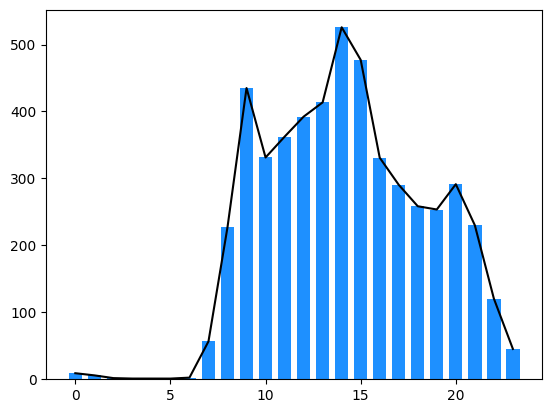

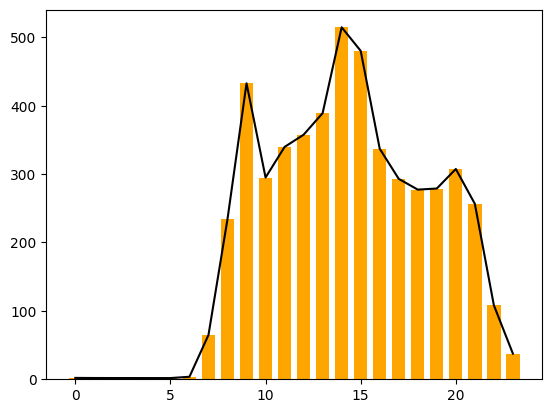

In [ ]:
a_mean = []

for i in range(len(actual_mySeries)-1):
  a_mean.append(actual_mySeries[i]["발전량"].mean())

#막대 그래프
x = [i for i in range(24)]
y = [a_mean[i] for i in range(0, 24)]
plt.bar(x, y, width=0.7, color="dodgerblue")

#선 그래프
cv_list = {
            'actual':a_mean,
          }
df = pd.DataFrame.from_dict(cv_list)

plt.plot(x, y, color = 'black')
plt.show()


## 예측 발전량 평균
p_mean = []

for i in range(len(predict_mySeries)-1):
  p_mean.append(predict_mySeries[i]["발전량"].mean())

#막대 그래프
x = [i for i in range(24)]
y = [p_mean[i] for i in range(0, 24)]
plt.bar(x, y, width=0.7, color="orange")

#선 그래프
cv_list = {
            'predict':p_mean,
          }
df = pd.DataFrame.from_dict(cv_list)

plt.plot(x, y, color = 'black')
plt.show()